# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install facebook_scraper pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('Data/TheAnhh966_clean.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         180 non-null    int64 
 1   post_id            180 non-null    int64 
 2   text               180 non-null    object
 3   post_text          180 non-null    object
 4   time               180 non-null    object
 5   timestamp          180 non-null    int64 
 6   image_lowquality   180 non-null    object
 7   images             180 non-null    object
 8   images_lowquality  180 non-null    object
 9   video              180 non-null    object
 10  likes              180 non-null    int64 
 11  comments           180 non-null    int64 
 12  shares             180 non-null    int64 
 13  post_url           180 non-null    object
 14  links              180 non-null    object
 15  user_id            180 non-null    int64 
 16  username           180 non-null    object
 1

## Reactions analysis

In [7]:
#Tổng các Reactions cơ bản 
sum_basic_stats = df[['likes', 'comments', 'shares']].sum()
sum_basic_stats


likes       644720
comments     30156
shares       11945
dtype: int64

In [8]:
#Mô tả thống kê Reactions cơ bản
basic_stats = df[['likes', 'comments', 'shares']].describe()
basic_stats

,likes,comments,shares
count,180.000000,180.000000,180.000000
mean,3581.777778,167.533333,66.361111
std,3886.026489,420.064273,273.761217
min,100.000000,1.000000,0.000000
25%,1173.250000,24.000000,2.000000
50%,2128.500000,58.500000,8.500000
75%,4324.000000,139.250000,39.250000
max,21751.000000,4500.000000,3300.000000


In [9]:
#Tách từng loại react trong reactions
reactions = df['reactions'].apply(lambda x : dict(eval(x))).apply(pd.Series)
reactions = reactions.fillna(0).astype(int)
df = pd.concat([df, reactions], axis = 1)

C:\Users\Xoai\AppData\Local\Temp\ipykernel_17960\1971960557.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  reactions = df['reactions'].apply(lambda x : dict(eval(x))).apply(pd.Series)


In [10]:
#Kiểm tra
df.head(5)

,Unnamed: 0,post_id,text,post_text,time,timestamp,image_lowquality,images,images_lowquality,video,...,page_id,fetched_time,start_url,like,love,haha,wow,care,sad,angry
0,0,880503520199048,Món đồ chơi mà con trai ai cũng ao ước.,Món đồ chơi mà con trai ai cũng ao ước.,2023-11-30 15:01:03,1701331263,https://scontent.fhan3-1.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-1.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,...,633568587122902,2023-11-30 15:50:08.404611,https://m.facebook.com/TheAnhh96/,100,1,77,1,0,0,0
1,1,880427826873284,Hành trang sang Thái tác nghiệp tại giải Pubg ...,Hành trang sang Thái tác nghiệp tại giải Pubg ...,2023-11-30 11:03:27,1701317007,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,...,633568587122902,2023-11-30 15:50:19.362991,https://m.facebook.com/TheAnhh96/,493,3,236,1,3,4,0
2,2,880163253566408,Thử Thách 1 Ngày Làm Cướp.,Thử Thách 1 Ngày Làm Cướp.,2023-11-30 03:00:58,1701288058,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,...,633568587122902,2023-11-30 15:50:51.847323,https://m.facebook.com/TheAnhh96/,741,1,643,2,0,9,0
3,3,880093000240100,"Sao, bắn vậy ae đã trớ chưa. ???","Sao, bắn vậy ae đã trớ chưa. ???",2023-11-29 19:09:40,1701259780,https://scontent.fhan3-2.fna.fbcdn.net/v/t15.5...,[],['https://scontent.fhan3-2.fna.fbcdn.net/v/t15...,https://scontent.fhan3-1.fna.fbcdn.net/v/t42.1...,...,633568587122902,2023-11-30 15:51:41.896466,https://m.facebook.com/TheAnhh96/,1174,9,585,5,2,8,0
4,4,880006503582083,Ôi anh Long.,Ôi anh Long.,2023-11-29 15:11:01,1701245461,https://scontent.fhan3-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,['https://scontent.fhan3-1.fna.fbcdn.net/v/t39...,[],...,633568587122902,2023-11-30 15:51:58.953159,https://m.facebook.com/TheAnhh96/,3718,19,1448,8,3,13,0


Thống kê các Reactions của tất cả bài post

In [11]:
#Tổng từng loại React 
like = df['like'].sum()
love = df['love'].sum()
haha = df['haha'].sum()
care = df['care'].sum()
angry = df['angry'].sum()
wow = df['wow'].sum()
sad = df['sad'].sum()
comment = df['comments'].sum()
share = df['shares'].sum()

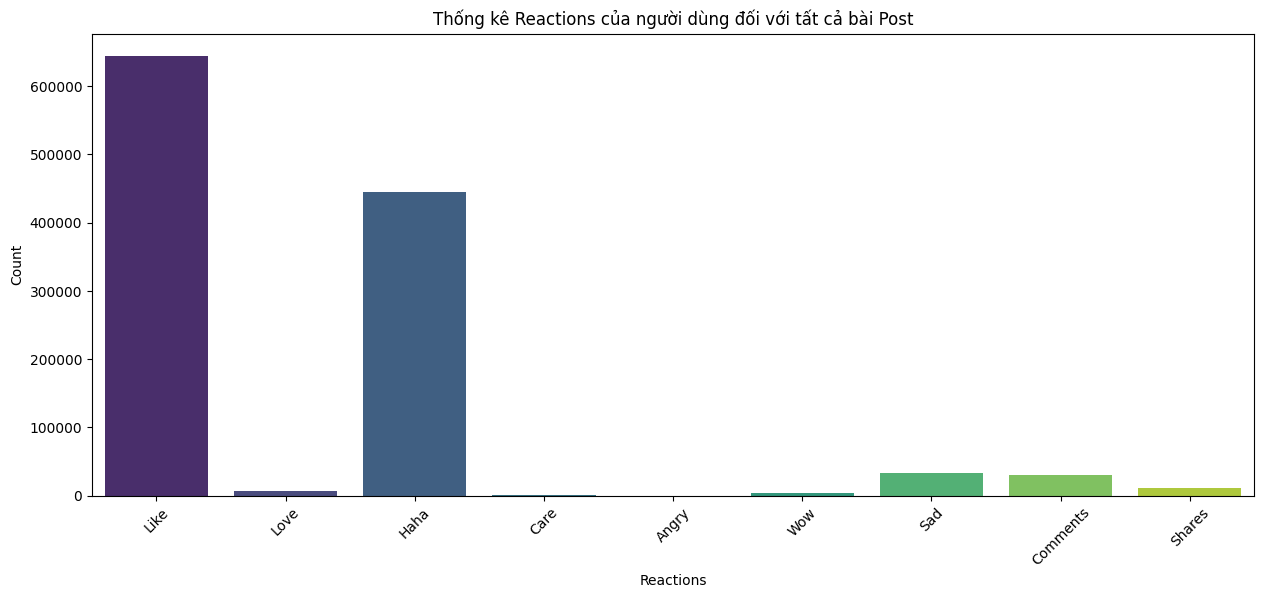

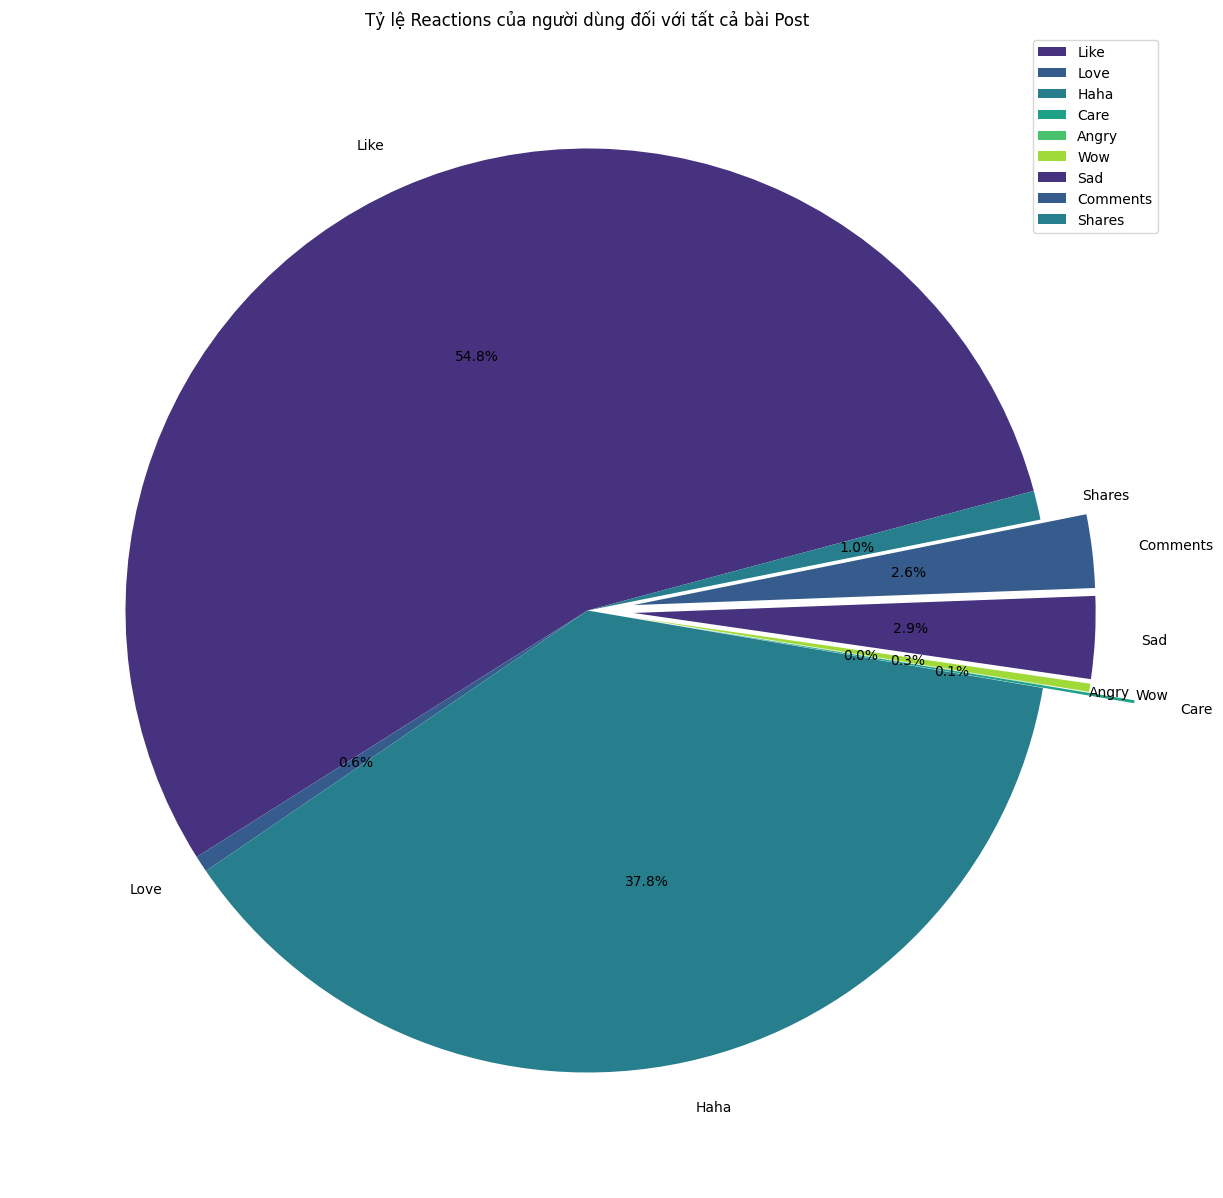

In [12]:
#Biểu đồ thống kê Reactions  
data = {
    'Reaction': ['Like', 'Love', 'Haha', 'Care', 'Angry', 'Wow', 'Sad','Comments','Shares'],
    'Count': [like, love, haha, care, angry, wow, sad, comment, share]
}

df_reactions = pd.DataFrame(data)
df_reactions['Reaction'] = df_reactions['Reaction']

plt.figure(figsize=(15, 6))
sns.barplot(x='Reaction', y='Count', data=df_reactions, hue='Reaction', palette='viridis', dodge=False)
plt.xlabel('Reactions')
plt.ylabel('Count')
plt.title("Thống kê Reactions của người dùng đối với tất cả bài Post")
plt.xticks(rotation=45)
plt.show()

explode = (0, 0, 0, 0.2, 0, 0.1, 0.1, 0.1, 0)
plt.figure(figsize=(15,15))
plt.pie(df_reactions['Count'], labels=df_reactions['Reaction'], autopct='%1.1f%%', startangle=15, labeldistance=1.1, colors=sns.color_palette('viridis'), explode=explode)
plt.title("Tỷ lệ Reactions của người dùng đối với tất cả bài Post")
plt.legend()
plt.show()

Phân tích lượt React theo thời gian

In [13]:
#Đổi định dạng thời gian về datatime
import datetime
df['time'] = df['time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [14]:
df[['post_id', 'reactions']]

,post_id,reactions
0,880503520199048,"{'like': 100, 'love': 1, 'haha': 77, 'wow': 1}"
1,880427826873284,"{'like': 493, 'love': 3, 'haha': 236, 'wow': 1..."
2,880163253566408,"{'like': 741, 'love': 1, 'haha': 643, 'wow': 2..."
3,880093000240100,"{'like': 1174, 'love': 9, 'haha': 585, 'wow': ..."
4,880006503582083,"{'like': 3718, 'love': 19, 'haha': 1448, 'wow'..."
...,...,...
175,835298124719588,"{'like': 2827, 'love': 14, 'haha': 4214, 'wow'..."
176,834844971431570,"{'like': 2085, 'love': 4, 'haha': 937, 'wow': ..."
177,834637588118975,"{'like': 1041, 'love': 8, 'haha': 742, 'wow': ..."
178,834480711467996,"{'like': 2040, 'love': 16, 'haha': 1104, 'wow'..."


In [15]:
df[['time','timestamp' ,'reaction_count']]


,time,timestamp,reaction_count
0,2023-11-30 15:01:03,1701331263,179
1,2023-11-30 11:03:27,1701317007,740
2,2023-11-30 03:00:58,1701288058,1396
3,2023-11-29 19:09:40,1701259780,1783
4,2023-11-29 15:11:01,1701245461,5209
...,...,...,...
175,2023-09-04 15:05:13,1693814713,7776
176,2023-09-03 16:35:34,1693733734,3061
177,2023-09-03 11:00:06,1693713606,1810
178,2023-09-02 21:14:51,1693664091,3206


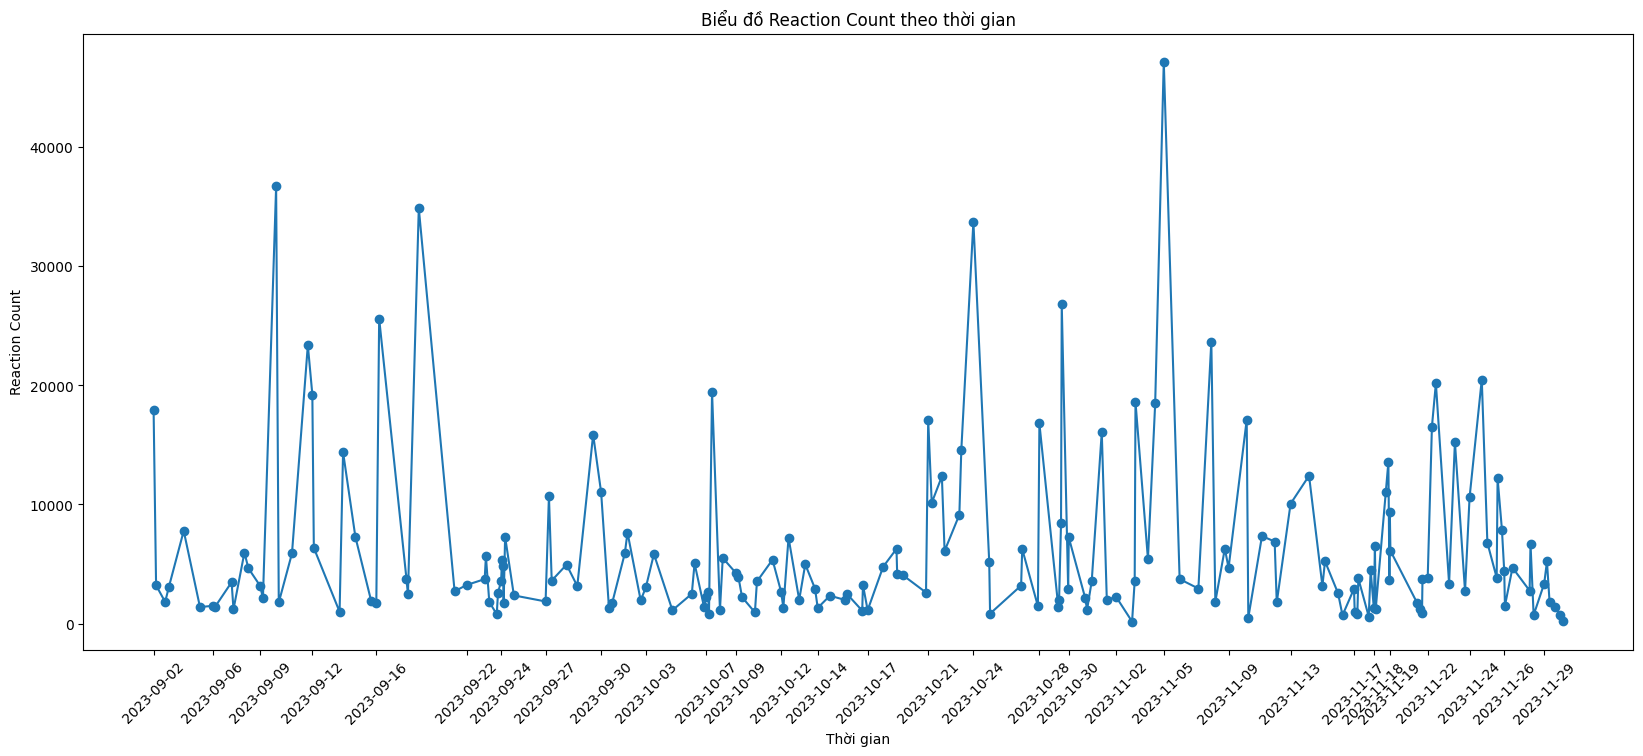

In [16]:
df['time'] = pd.to_datetime(df['time'])

# Sort the DataFrame by 'time' column
df = df.sort_values(by='time')


date = df['time'].tolist()
reaction_counts = df['reaction_count'].tolist()

plt.figure(figsize=(20, 8))
plt.plot(date, reaction_counts, marker='o', linestyle='-')
plt.title('Biểu đồ Reaction Count theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Reaction Count')

# Customize x-axis ticks based on your preference
# For example, show every other date
plt.xticks(date[:200:6], rotation=45)

plt.show()

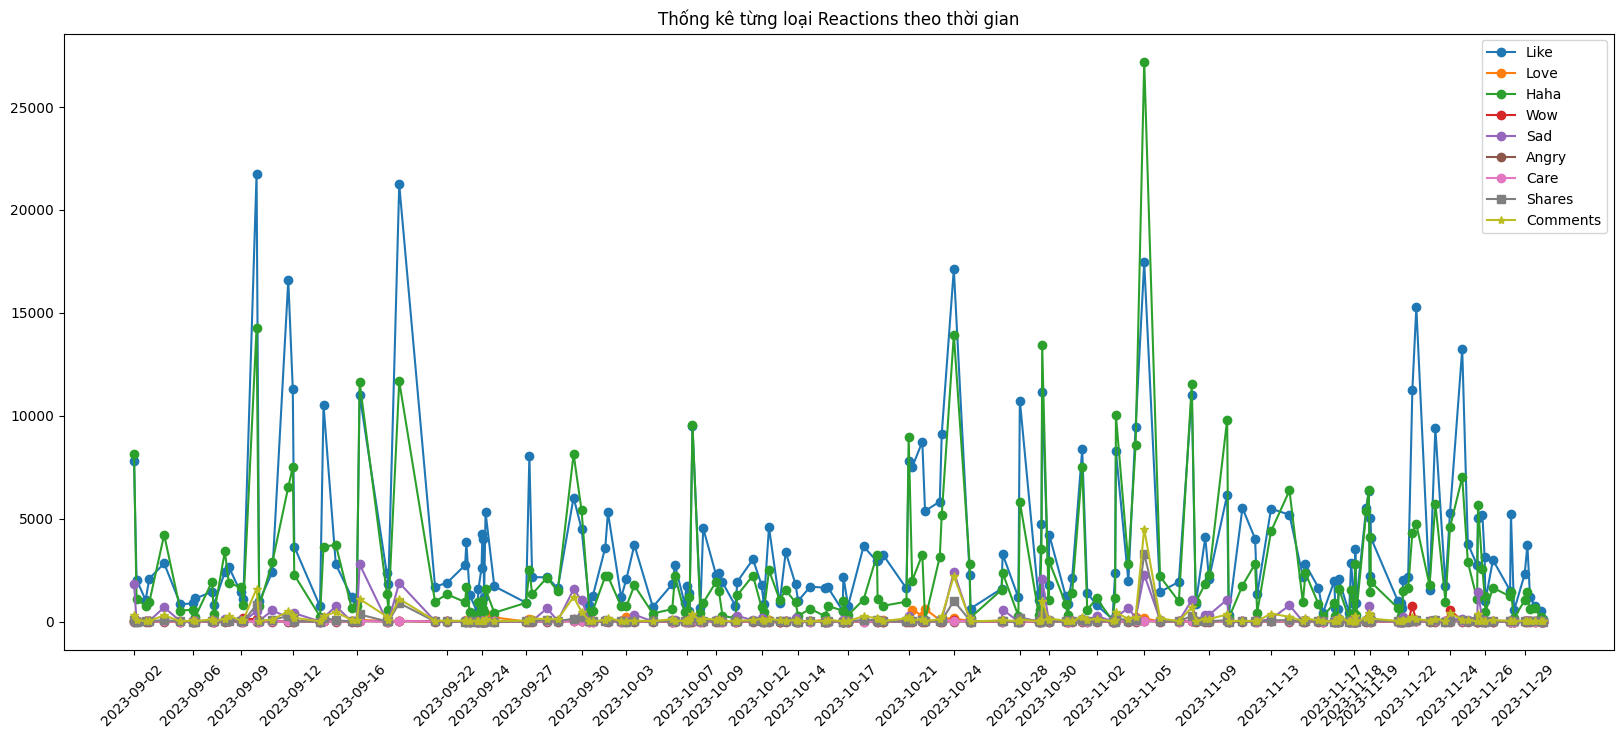

In [17]:
#Thống kê từng loại Reactions theo thời gian
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(20, 8))

reactions = ['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'shares', 'comments']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 's', '*']

for reaction, marker in zip(reactions, markers):
    ax.plot(df['time'], df[reaction], label=reaction.capitalize(), marker=marker)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d "))

plt.xticks(date[:200:6], rotation=45)
plt.title('Thống kê từng loại Reactions theo thời gian')
plt.legend()


Số lượt reactions dựa trên giờ trong một ngày

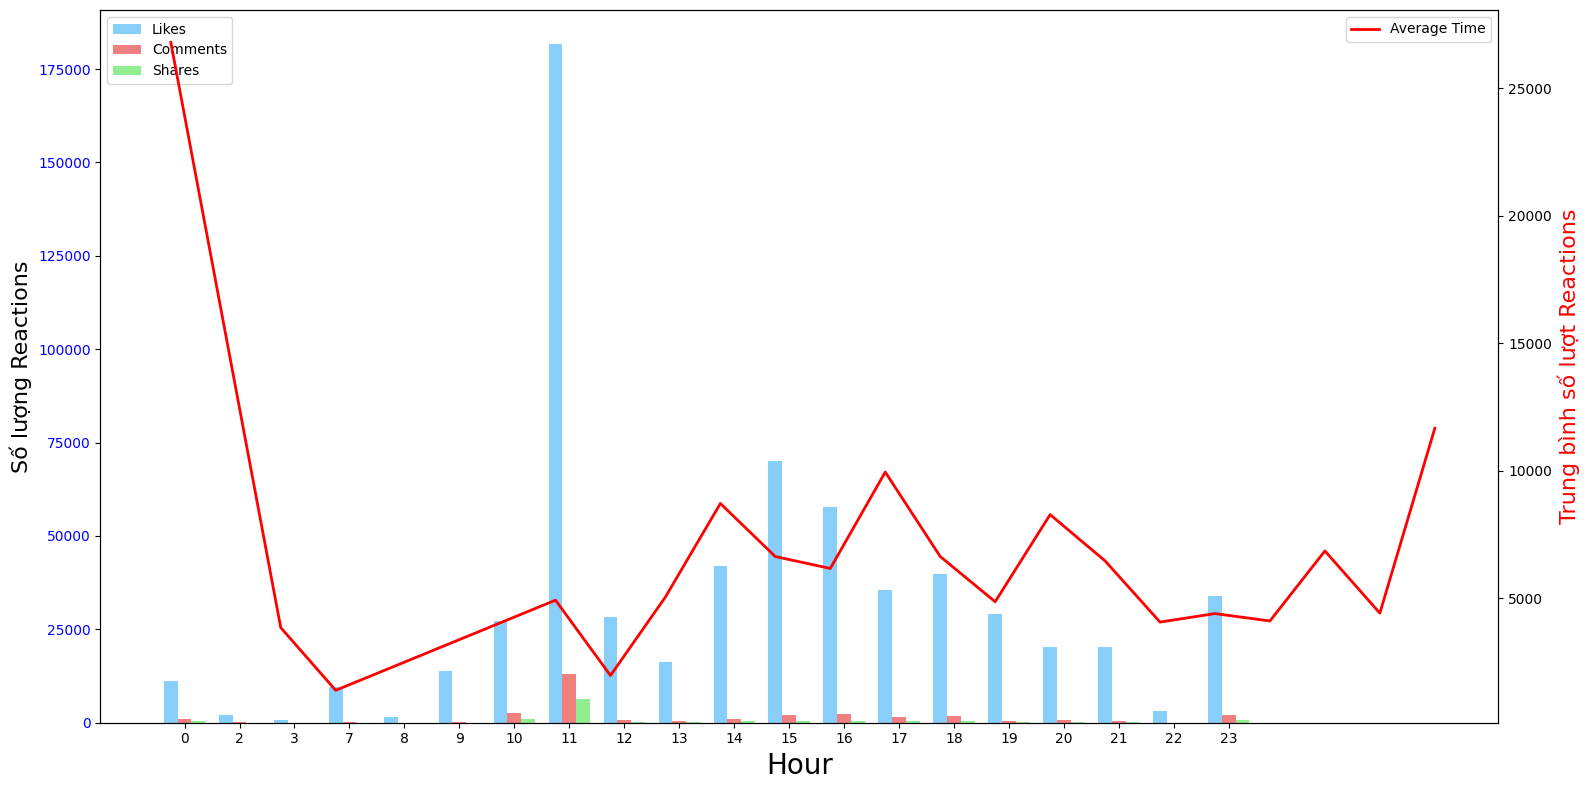

In [18]:
#Phân tích về số lượt reactions dựa trên giờ trong một ngày
df['hour'] = df['time'].dt.hour
hourly_reactions = df.groupby('hour')[['likes', 'comments', 'shares']].sum().reset_index()
line = df.groupby('hour')['reaction_count'].mean().reset_index()

x = np.arange(len(hourly_reactions['hour']))
width = 0.25
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_xlabel('Hour', fontsize=20)
ax1.set_ylabel('Số lượng Reactions', fontsize=16)
reaction_types = ['likes', 'comments', 'shares']

colors = ['lightskyblue', 'lightcoral', 'lightgreen']
for i, reaction_type in enumerate(reaction_types):
    ax1.bar(x + i * width, hourly_reactions[reaction_type], width=width, label=reaction_type.capitalize(), color=colors[i])
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Trung bình số lượt Reactions', color='red', fontsize=16)
ax2.plot(line['hour'], line['reaction_count'], color='red', label='Trung bình số lượt Reactions', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(['Average Time'], loc='upper right')

ax1.set_xticks(x + width)
ax1.set_xticklabels(hourly_reactions['hour'])
fig.tight_layout()
plt.show()


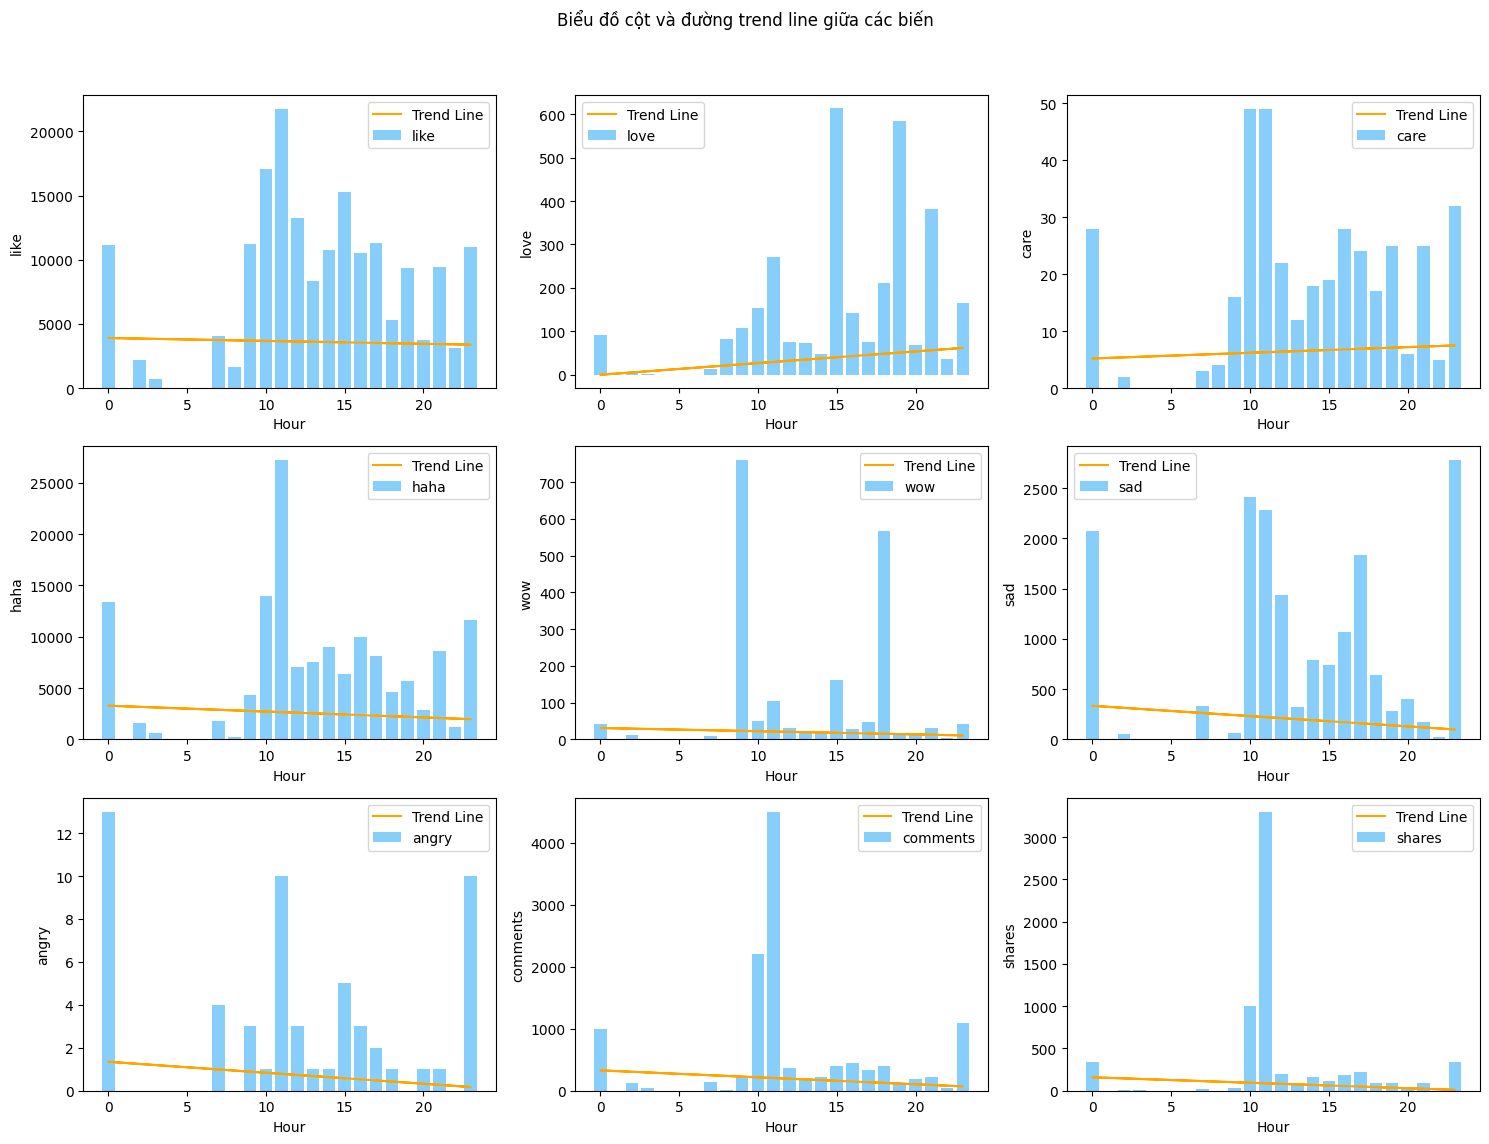

In [19]:
df['hour'] = df['time'].dt.hour
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Biểu đồ cột và đường trend line giữa các biến")

for i, column in enumerate(['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry', 'comments', 'shares']):
    ax = axes[i // 3, i % 3]
    X = df['hour']
    Y = df[column]
    
    ax.bar(X, Y, label=column, color='lightskyblue')  
    trend_line = np.polyfit(X, Y, 1)
    ax.plot(X, np.polyval(trend_line, X), color='orange', label='Trend Line')  # Change color and linestyle
    
    ax.set_xlabel('Hour')
    ax.set_ylabel(column)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Biểu đồ tương quan giữa các Reactions


<Axes: >

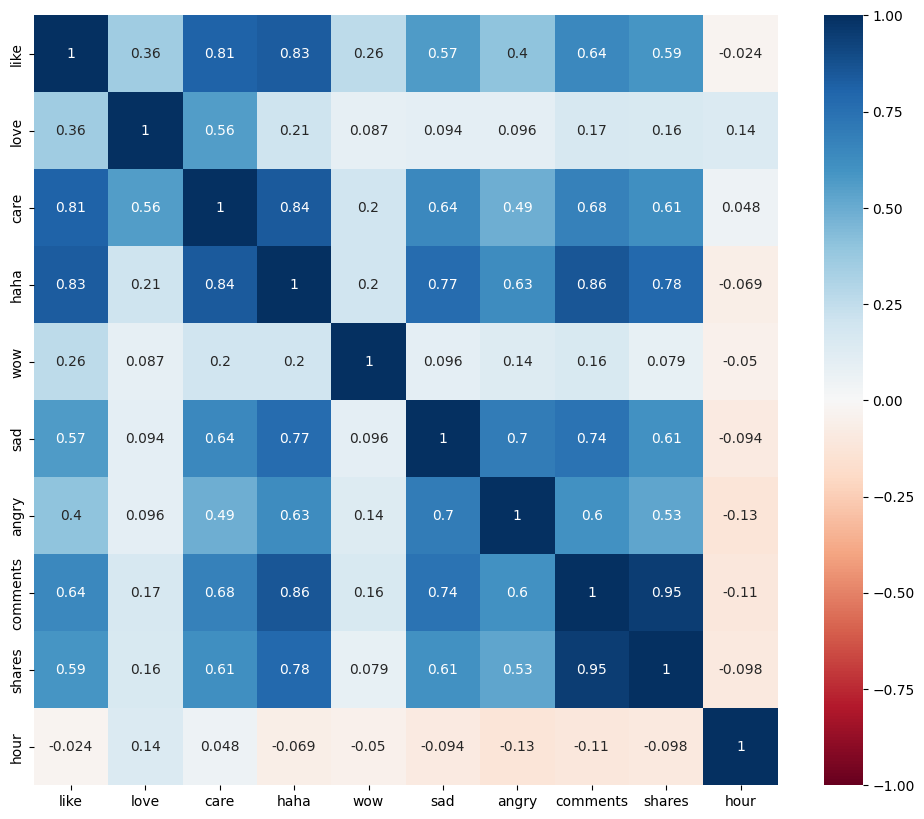

In [20]:
df['hour'] = df['time'].dt.hour
corr = df[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry', 'comments', 'shares', 'hour']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1)

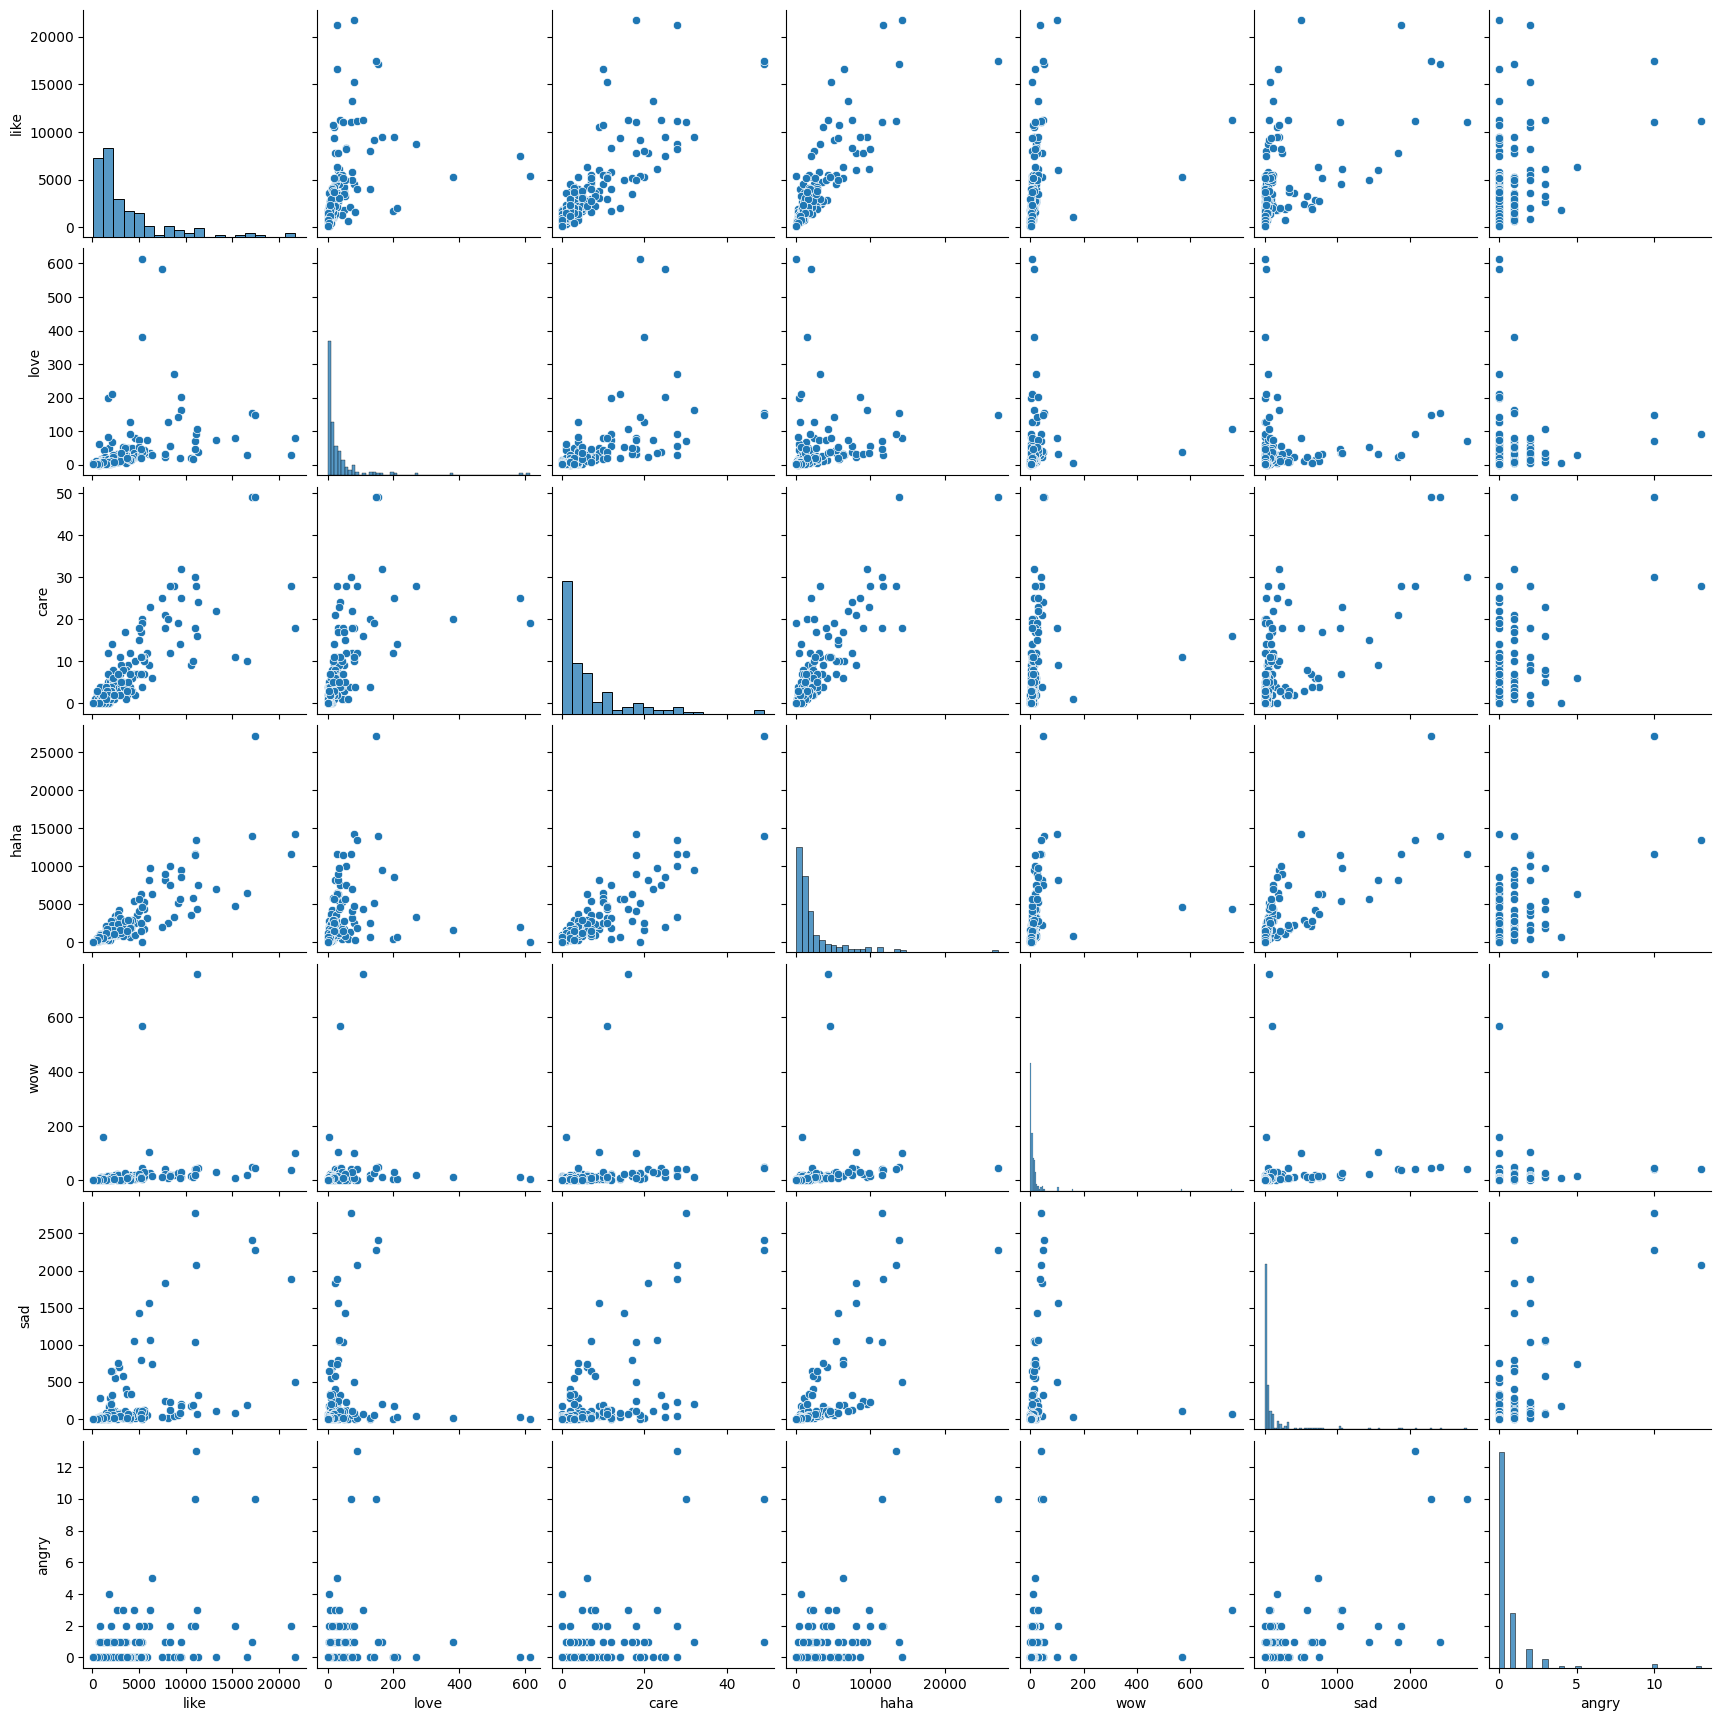

In [21]:
sns.pairplot(df, vars=['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry'])

## Comments analysis


In [22]:
#Tổng số lượt bình luận
df['comments'].sum()

30156

In [23]:
#Số lượng comment của các bài đăng dao động trong khoảng
df['comments'].median()

58.5

In [24]:
#Số lượng bình luận trung bình mỗi bài đăng
df['comments'].mean()

167.53333333333333

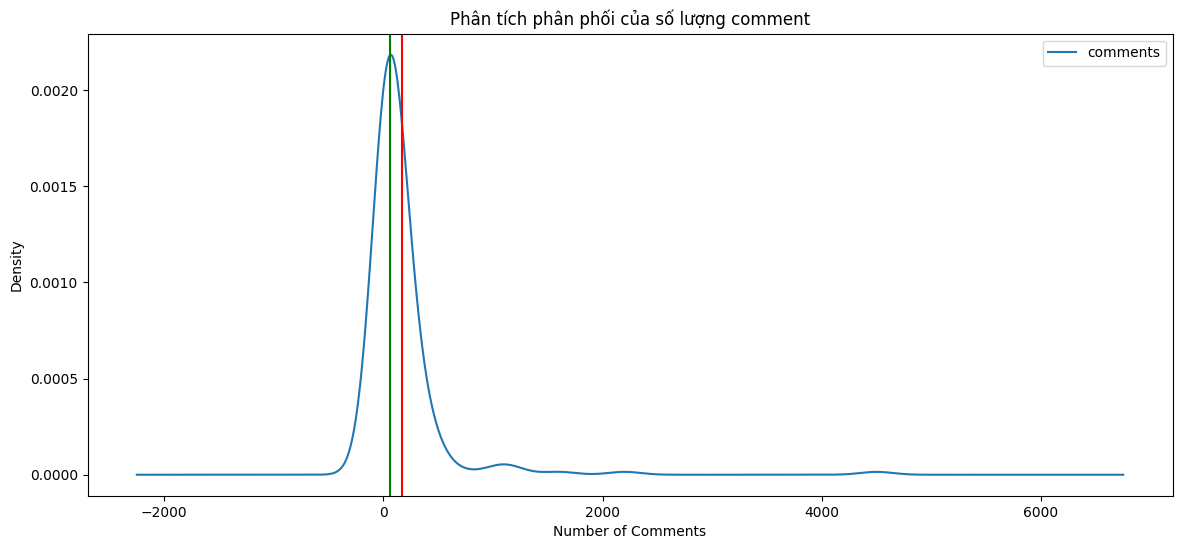

In [25]:
#Phân tích phân phối của số lượng comment
ax = df['comments'].plot(kind='density', figsize=(14,6)) 
ax.axvline(df['comments'].mean(), color='red')
ax.axvline(df['comments'].median(), color='green')

plt.legend()

plt.title("Phân tích phân phối của số lượng comment")
plt.xlabel("Number of Comments")
plt.ylabel("Density")
plt.show()

In [26]:
#Tách comments_full
comment_list = {'comment_text': [], 'comment_time': [], 'commenter_id': [], 'commenter_meta': []}
comments_full = df['comments_full'].dropna(axis=0)

for post in comments_full:
    for part in post.split(', \''):
        if part.startswith('comment_text\''):
            comment_list['comment_text'].append(part[16:-1])
        elif part.startswith('comment_time\''):
            comment_list['comment_time'].append(eval(part[15:]))
        elif part.startswith('commenter_id\''):
            comment_list['commenter_id'].append(part[16:-1])
        elif part.startswith('commenter_meta\''):
            comment_list['commenter_meta'].append(part[18:-1])

comment_df = pd.DataFrame(comment_list)
comment_df['comment_time'] = comment_df['comment_time'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

In [27]:
comment_df.head(5)

,comment_text,comment_time,commenter_id,commenter_meta
0,Yên tâm quá rồi ny k bị sao đúng k e :)),2023-08-30 00:00:00,100047182242072,Author
1,TheAnh96 đc ngkh bảo vệ cho r a ơi,2023-08-30 00:00:00,100021095443813,on
2,TheAnh96 đi với anh 🐧,2023-08-30 00:00:00,100022675294651,Top fan
3,Hết cứu :)),2023-08-30 00:00:00,100040482850608,on
4,TheAnh96 bộ trưởng bộ lạc quan 😂,2023-08-30 00:00:00,100054825105449,on


In [28]:
# Phân tích người comment nhiều nhất
top_commenters = comment_df['commenter_id'].value_counts().head(10)
top_commenters

commenter_id
100047182242072    134
100053912474719     16
100035484700014     15
100024823266755     15
100029555409722     12
100041640854172     11
100045039366587     11
100092170441518     10
100049604956490      7
100075717129368      7
Name: count, dtype: int64

In [29]:
# Phân tích cmt được cmt nhiều nhất
top_comment = comment_df['comment_text'].value_counts().head(10)
top_comment

comment_text
?                      26
#flicknhanhnhatv\nn    24
:))                    21
Ác                     14
Author\nTheAnh96       14
hihi                   13
=))                    12
:)))                   11
TheAnh96                8
Vươn tầm quốc tế        8
Name: count, dtype: int64

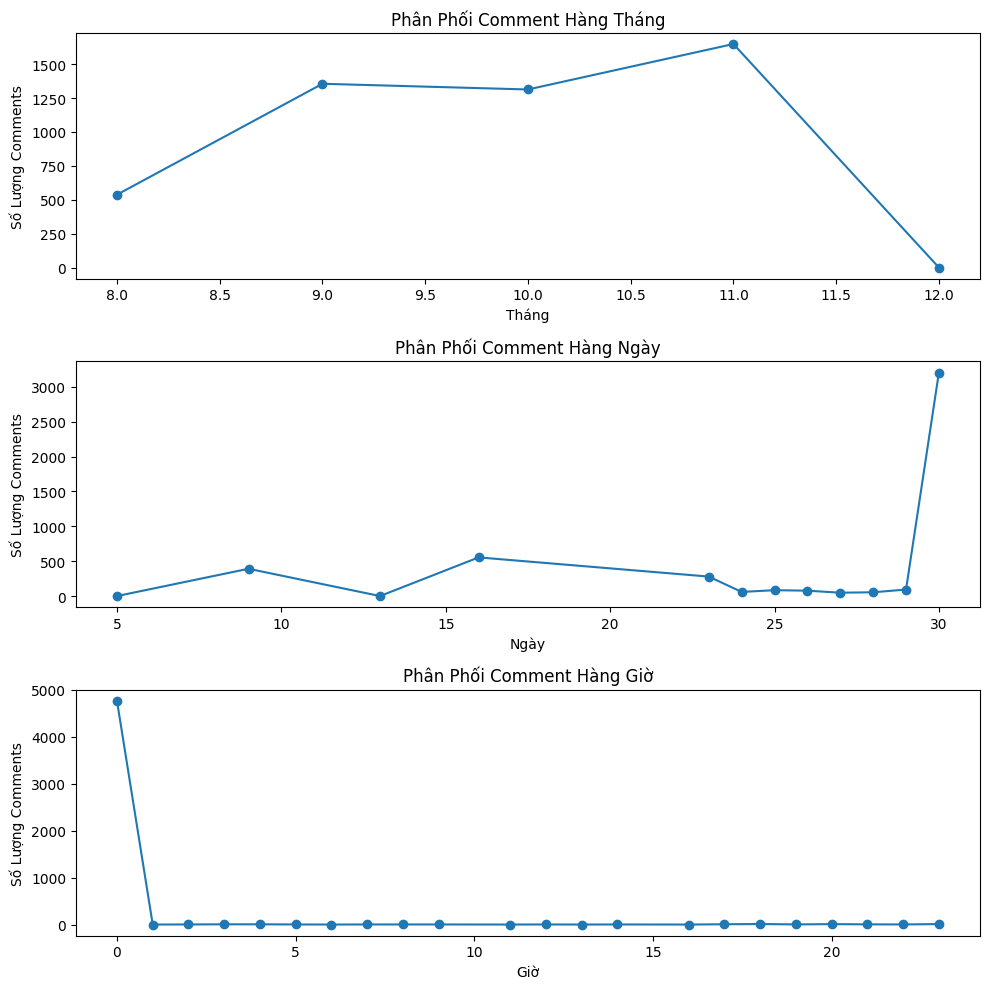

In [30]:
#Thống kê sự phân phối thời gian của comment
comment_df['comment_time'] = pd.to_datetime(comment_df['comment_time'])

comment_df['month'] = comment_df['comment_time'].dt.month
comment_df['day'] = comment_df['comment_time'].dt.day
comment_df['hour'] = comment_df['comment_time'].dt.hour

monthly_counts = comment_df['month'].value_counts().sort_index()
daily_counts = comment_df['day'].value_counts().sort_index()
hourly_counts = comment_df['hour'].value_counts().sort_index()


fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Biểu đồ đường thống kê theo tháng
axes[0].plot(monthly_counts.index, monthly_counts.values, marker='o')
axes[0].set_title('Phân Phối Comment Hàng Tháng')
axes[0].set_xlabel('Tháng')
axes[0].set_ylabel('Số Lượng Comments')

# Biểu đồ đường thống kê theo ngày
axes[1].plot(daily_counts.index, daily_counts.values, marker='o')
axes[1].set_title('Phân Phối Comment Hàng Ngày')
axes[1].set_xlabel('Ngày')
axes[1].set_ylabel('Số Lượng Comments')

# Biểu đồ đường thống kê theo giờ
axes[2].plot(hourly_counts.index, hourly_counts.values, marker='o')
axes[2].set_title('Phân Phối Comment Hàng Giờ')
axes[2].set_xlabel('Giờ')
axes[2].set_ylabel('Số Lượng Comments')

plt.tight_layout()
plt.show()

In [31]:
# data = {
#     'reaction_count': df['reaction_count'],
#     'likes': df['likes'],
#     'comments': df['comments'],
#     'shares': df['shares']
# }

# # # Tính tổng like, dislike, và reply theo từng người comment
# # df_grouped = df.groupby('reaction_count').agg({'likes': 'sum', 'comments': 'sum', 'shares': 'sum'}).reset_index()

# # Trực quan hóa
# plt.figure(figsize=(10, 6))

# plt.bar(df_grouped['reaction_count'] - 0.2, df_grouped['likes'], width=0.2, label='Likes', align='center')
# plt.bar(df_grouped['reaction_count'], df_grouped['comments'], width=0.2, label='Comments', align='center')
# plt.bar(df_grouped['reaction_count'] + 0.2, df_grouped['shares'], width=0.2, label='Shares', align='center')

# plt.xlabel('Người comment')
# plt.ylabel('Số lượng tương tác')
# plt.title('Tương tác giữa các người comment')
# plt.legend()
# plt.show()

In [32]:
import collections
import matplotlib.pyplot as plt
import numpy as np

def load_stopwords(file_path='Data//vietnamese-stopwords.txt'):
    stopwords = []
    with open(file_path, encoding='utf-8') as file:
        for line in file:
            word = line.rstrip('\n')
            stopwords.append(word)
    return stopwords

def process_text(text_series):
    return ' '.join(text_series.str.replace('\n', ' '))

def plot_most_frequent_words(texts, stopwords, top_n=10, figsize=(20, 10), title='', xlabel='Words', ylabel='Count'):
    filtered_words = [word for word in texts.split() if word not in stopwords and not word.isnumeric()]
    words, counts = zip(*collections.Counter(filtered_words).most_common(top_n))
    
    plt.figure(figsize=figsize)
    plt.bar(words, counts, color=plt.cm.rainbow(np.linspace(0, 1, top_n)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=30, color='black')
    plt.show()

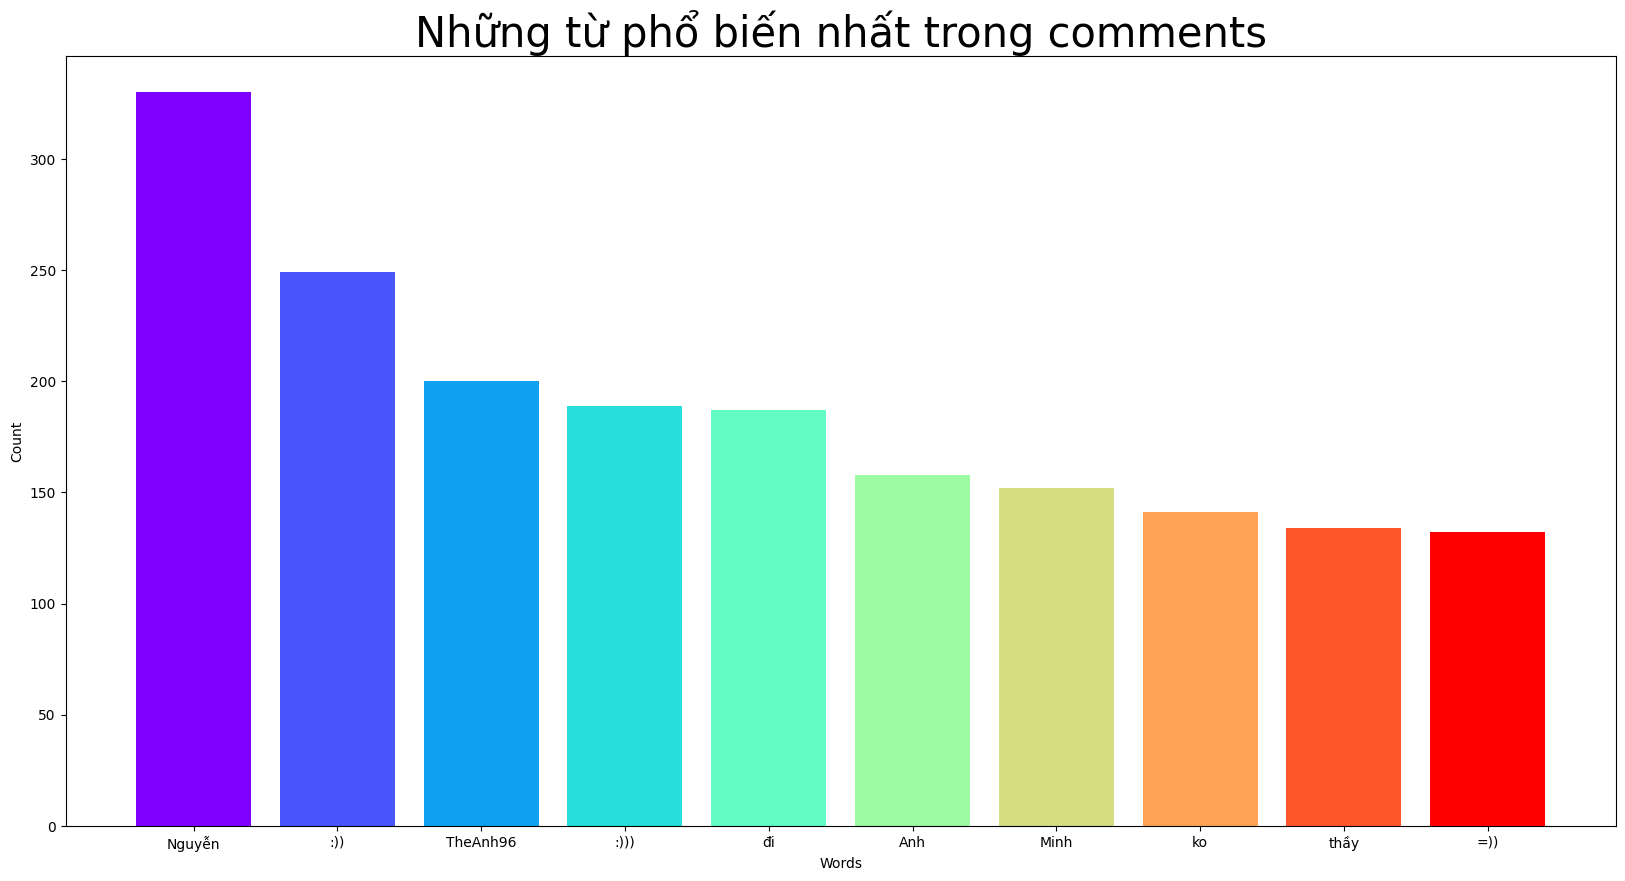

In [33]:
vn_stopwords = load_stopwords()
comment_texts = process_text(comment_df['comment_text']).replace('\\u200c', '')
plot_most_frequent_words(comment_texts, vn_stopwords, title='Những từ phổ biến nhất trong comments')


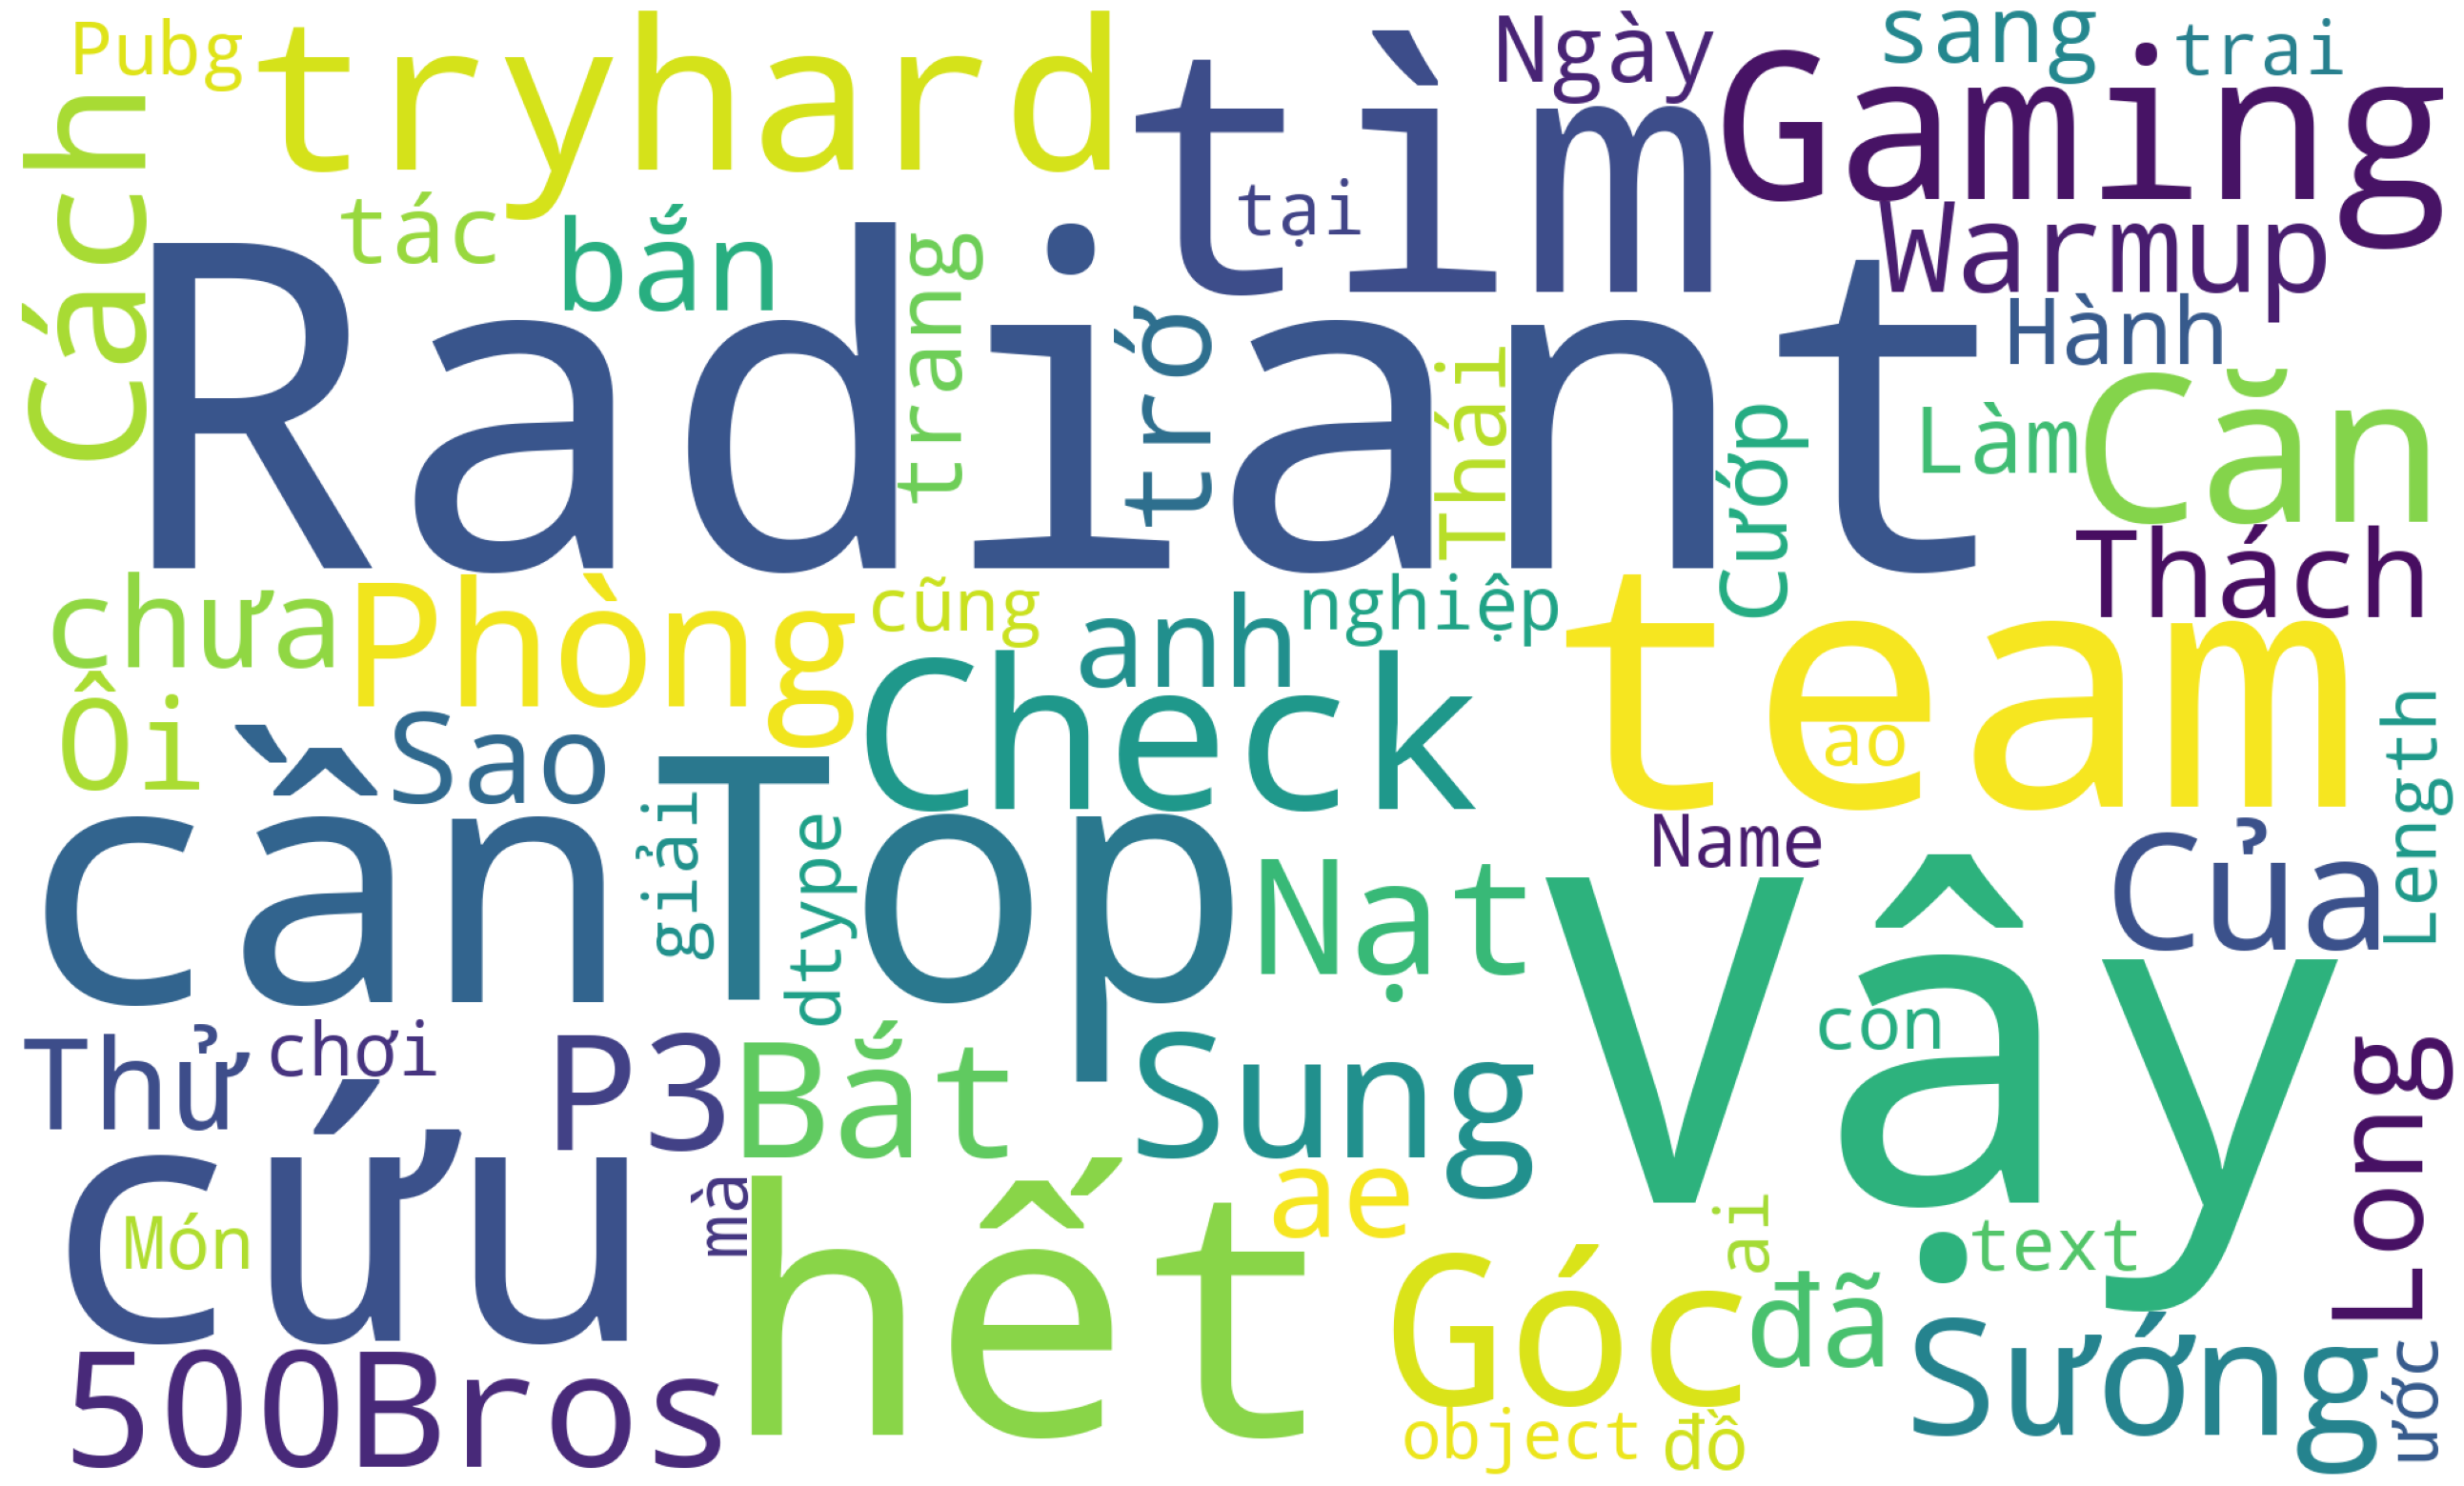

In [34]:
from wordcloud import WordCloud, STOPWORDS
text = str(df['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Article Analysis

In [35]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Phân tích độ tương tác theo thời gian trong ngày

In [36]:
#Phân tích các khung giờ đăng post
import plotly.express as px

df['hour'] = df['time'].dt.hour
fig = px.box(df, x='hour', points="all", title='Khung giờ đăng bài', labels={'hour': 'Hour', 'value': 'Number of posts'})
fig.update_layout(xaxis=dict(type='category'))

fig.show()


Phân tích các từ phổ biến trong post


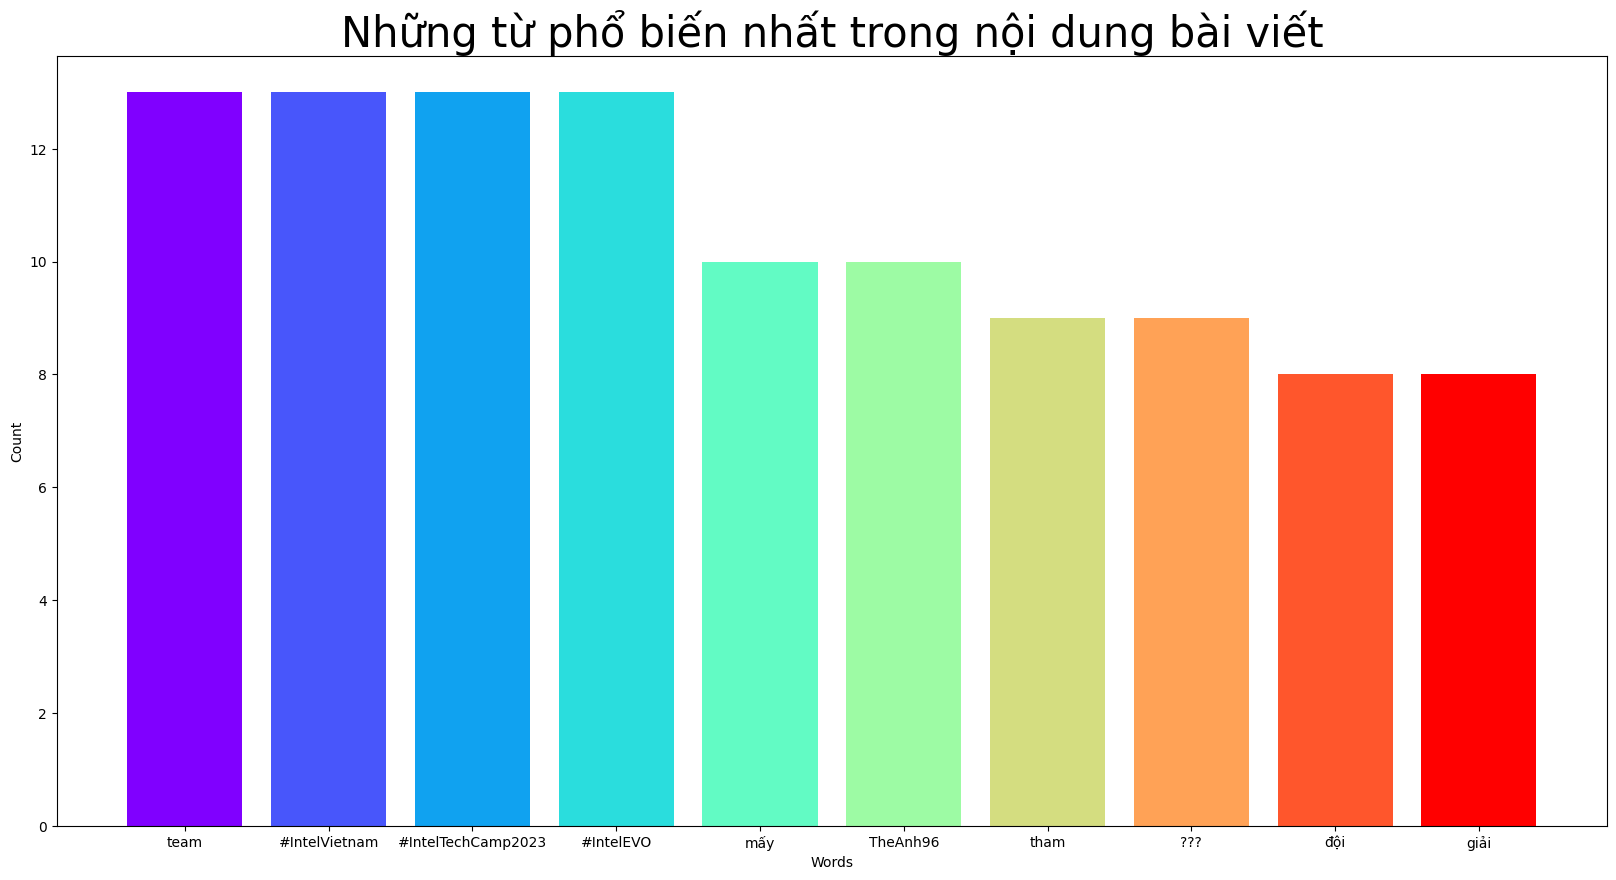

In [37]:
#Phân tích các từ phổ biến trong post
vn_stopwords = load_stopwords()
post_texts = process_text(df['post_text'])
plot_most_frequent_words(post_texts, vn_stopwords, title='Những từ phổ biến nhất trong nội dung bài viết')

Đánh giá sự phổ biến của các loại post

In [38]:
#Phân loại các loại post
columns_to_process = ['video', 'images']
for col in columns_to_process:
    df[col] = df[col].replace("[]", '').fillna(0)
    df[f'has_{col}'] = df[col].astype(bool)

df['has_text'] = df['post_text'].astype(bool)

def determine_post_type(row):
    has_video, has_images, has_text = row['has_video'], row['has_images'], row['has_text']
    if has_video + has_images + has_text == 3:
        return 'Text, Video, and Images'
    elif has_video + has_text == 2:
        return 'Text and Video'
    elif has_images + has_text == 2:
        return 'Text and Images'
    elif has_video + has_images == 2:
        return 'Video and Images'
    elif has_video == 1:
        return 'Video'
    elif has_images == 1:
        return 'Images'
    elif has_text == 1:
        return 'Text'
    else:
        return 'Unknown'


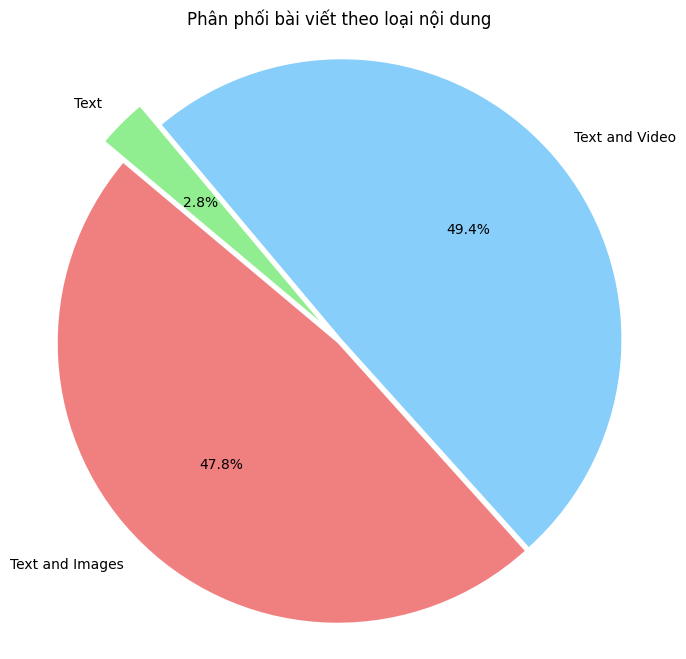

In [39]:
#Biểu đồ tròn đánh giá sự phổ biến của các loại post
text_images_count = df[(df['has_text'] == 1) & (df['has_images'] == 1)].shape[0]
text_video_count = df[(df['has_text'] == 1) & (df['has_video'] == 1)].shape[0]
only_text_count = df[(df['has_text'] == 1) & (df['has_images'] == 0) & (df['has_video'] == 0)].shape[0]

labels = ['Text and Images', 'Text and Video', 'Text']
sizes = [text_images_count, text_video_count, only_text_count]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.01, 0.01, 0.1)

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Để đảm bảo biểu đồ tròn được vẽ hình vuông
plt.title('Phân phối bài viết theo loại nội dung')
plt.show()

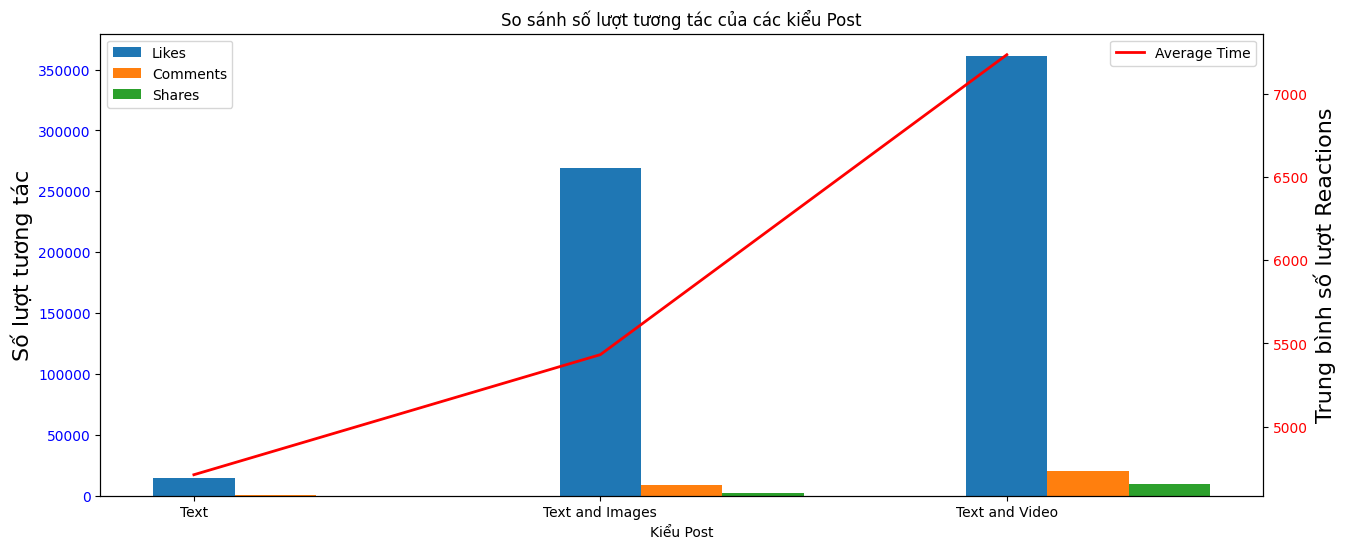

In [40]:
#Biểu đồ cột so sánh số lượt tương tác của các kiểu post
df['post_type'] = df.apply(determine_post_type, axis=1)
df['post_type']
interaction_counts = df.groupby('post_type')[['likes', 'comments', 'shares']].sum()
line = df.groupby('post_type')['reaction_count'].mean().reset_index()

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots(figsize=(15, 6))

bar_width = 0.2
index = list(range(len(interaction_counts)))
interaction_types = ['likes', 'comments', 'shares']
for i, interaction_type in enumerate(interaction_types):
    ax1.bar([pos + i * bar_width for pos in index], interaction_counts[interaction_type], bar_width, label=interaction_type.capitalize())

ax1.set_xlabel('Kiểu Post')
ax1.set_ylabel('Số lượt tương tác' , fontsize=16)
ax1.set_title('So sánh số lượt tương tác của các kiểu Post')
ax1.set_xticks(index)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(interaction_counts.index)
ax1.legend(loc='upper left')

# Biểu đồ đường
ax2 = ax1.twinx()
sns.lineplot(x='post_type', y='reaction_count', data=line, color='red', label='Trung bình số lượt Reactions', ax=ax2, linewidth=2)

ax2.set_ylabel('Trung bình số lượt Reactions', color='black', fontsize=16)
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(['Average Time'], loc='upper right')

plt.show()


Reactor Analyze


In [73]:
df_reactors = pd.read_csv('Data/Reactors1_id.csv')

In [74]:
df_reactors.describe()

,Friend_count,Follower_count,Following_count,id
count,418.000000,0.0,0.0,1.058000e+03
mean,413.492823,NaN,NaN,9.963484e+13
std,518.107353,NaN,NaN,5.213579e+12
min,3.000000,NaN,NaN,5.184752e+08
25%,126.250000,NaN,NaN,1.000141e+14
50%,234.000000,NaN,NaN,1.000361e+14
75%,533.250000,NaN,NaN,1.000738e+14
max,4870.000000,NaN,NaN,1.000954e+14


In [75]:
for col in df_reactors.columns:
    # Check if the column name starts with 'Giới thiệu'
    if col.startswith('Giới thiệu'):
        mask = df_reactors[col].notna()
        intro = df_reactors.loc[mask, col].values[0]
        df_reactors.loc[mask, 'Introduction'] = intro
        # Break out of the loop since we only need to do this once
        print('Found ' + col)
        print(intro)
        print()
        df_reactors.drop(col, axis=1, inplace=True)

In [76]:
df_reactors.loc[df_reactors['Nơi từng sống'].notna(), ['Name', 'Nơi từng sống']].head(5)

,Name,Nơi từng sống
0,Nguyễn T.An,Hà Nội\nTỉnh/Thành phố hiện tại\nHà Nội\nQuê quán
1,Son Tung,Hà Nội\nTỉnh/Thành phố hiện tại\nLạng Sơn\nQuê...
7,Dũng Ma,"New City, New York\nTỉnh/Thành phố hiện tại\nM..."
8,Phat Duc,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại
9,Minh Lê,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại...


In [77]:
df_reactors.loc[df_reactors['Học vấn'].notna(), ['Name', 'Học vấn']].head(5)

,Name,Học vấn
0,Nguyễn T.An,Trường THCS Vĩnh Quỳnh\nTrường trung học
1,Son Tung,Trường Đại học Ngoại ngữ - Đại học Quốc gia Hà...
4,Minh Sang,Trường THPT Nguyễn Du BRVT\nTrường trung học
7,Dũng Ma,Dubai\nCao đẳng/Đại học\nAnahuacalmecac Intern...
9,Minh Lê,Trường Đại học Bách khoa - ĐH Quốc gia TP.HCM\...


In [78]:
def extract_location(place):
    '''
    Extract location from data string
    '''
    if place:
        location = place.split('\n')
        if len(location) < 3:
            return location[0], None
        else:
            return location[0], location[2]
    return None, None

commenter_df['location'] = commenter_df['Nơi từng sống'].apply(lambda x: extract_location(x)[0] if x else None)
commenter_df['hometown'] = commenter_df['Nơi từng sống'].apply(lambda x: extract_location(x)[1] if x else None)

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
def extract_location(x):
    if isinstance(x, str):
        location = x.split('\n')
        city = location[0] if len(location) > 0 else None
        country = location[2] if len(location) > 2 else None
        return city, country
    else:
        return None, None

df_reactors['location'] = df_reactors['Places lived'].apply(lambda x: extract_location(x)[0])
df_reactors['hometown'] = df_reactors['Places lived'].apply(lambda x: extract_location(x)[1])


In [ ]:
df_reactors['hometown']

0      None
85     None
87     None
135    None
136    None
       ... 
533    None
534    None
535    None
536    None
538    None
Name: hometown, Length: 112, dtype: object

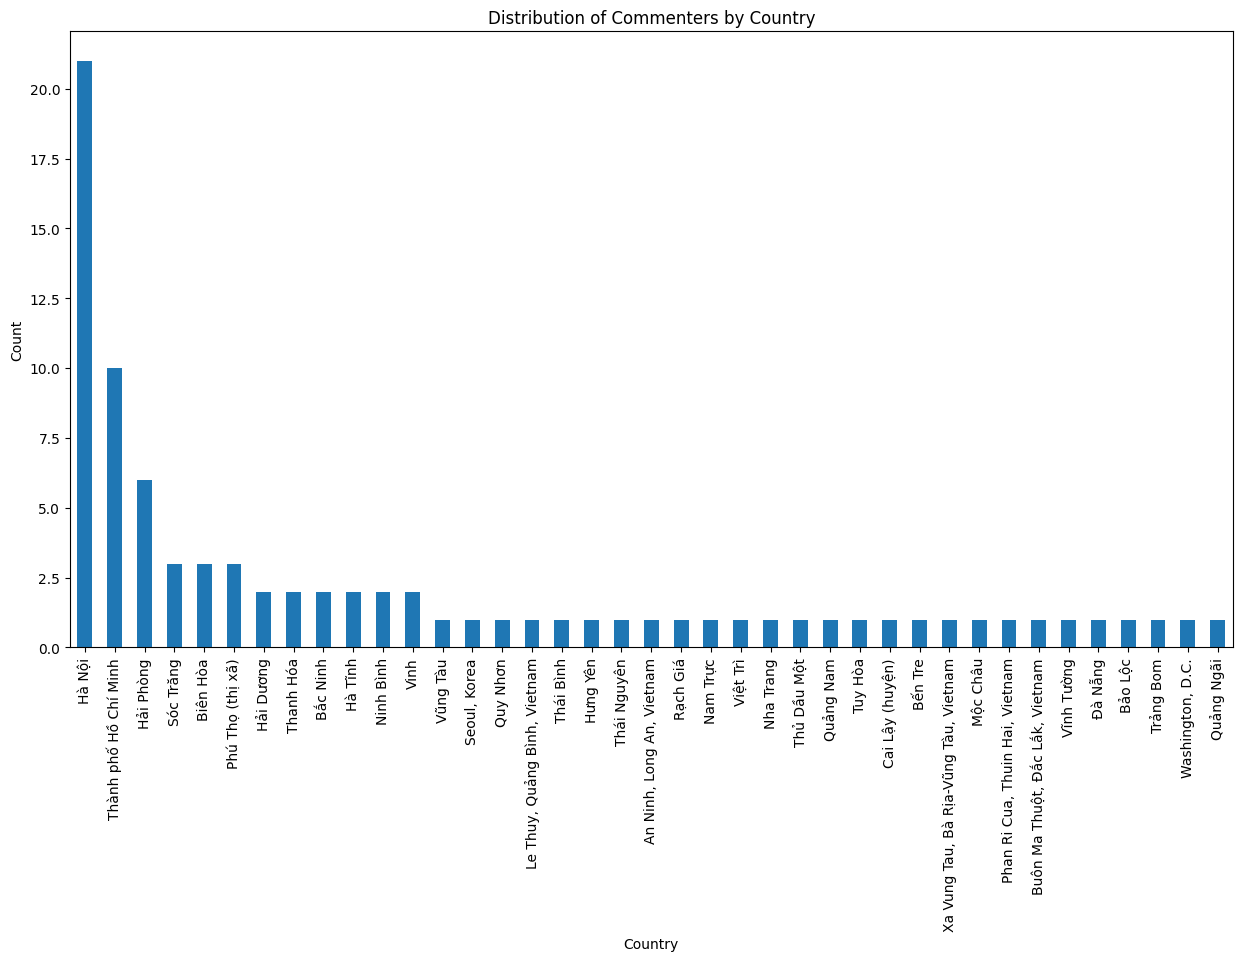

In [ ]:
df_reactions['hometown'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Distribution of Commenters by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

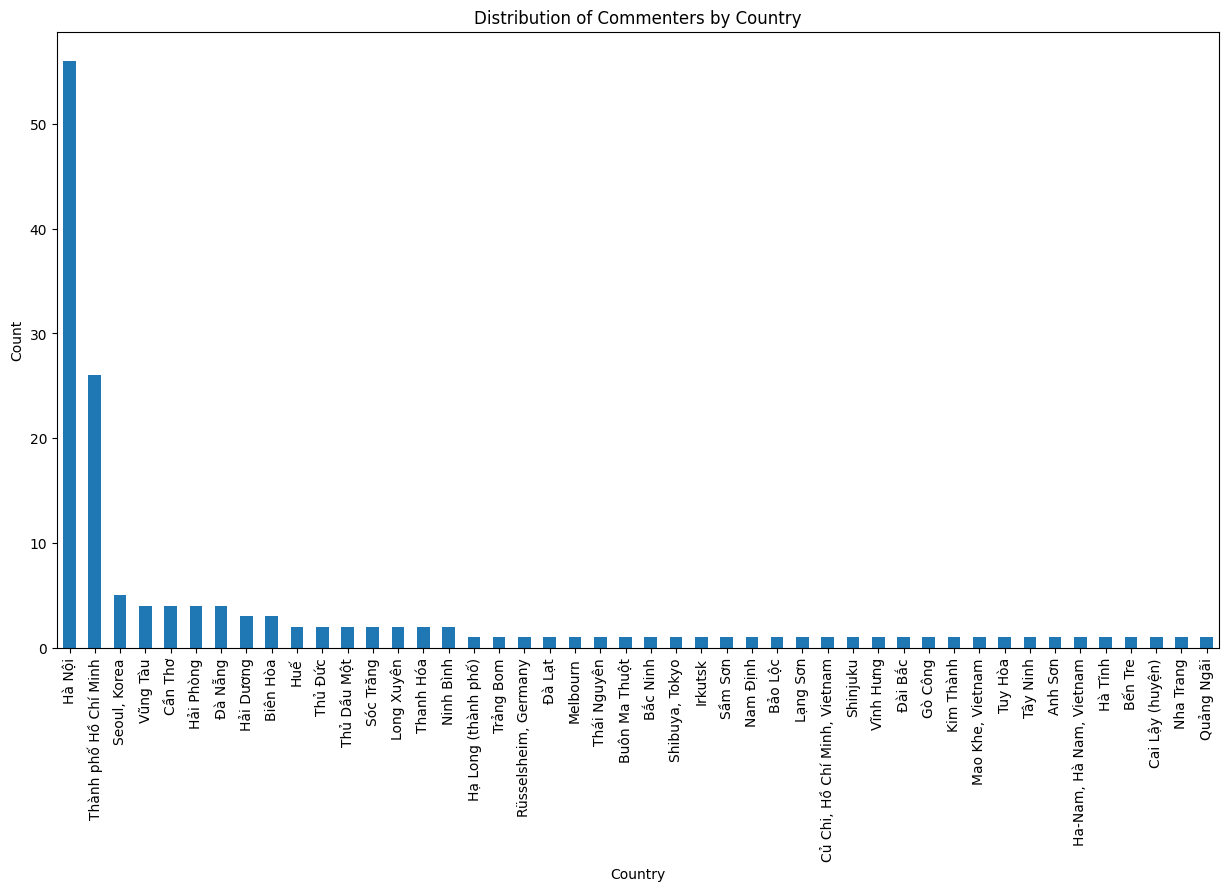

In [ ]:
df_reactions['location'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Distribution of Commenters by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Modeling


In [ ]:
from nltk.corpus import stopwords
from transformers import pipeline
from googletrans import Translator, constants
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    translator = Translator()
    text = translator.translate(text, dest='en').text
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    return text

df['cleaned_text'] = df['post_text'].apply(clean_text)

ModuleNotFoundError: No module named 'transformers'